# Cubic Interpolation with Scipy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicHermiteSpline

from HARK.interpolation import CubicInterp, CubicHermiteInterp

### Creating a HARK wrapper for scipy's CubicHermiteSpline

The class CubicHermiteInterp in HARK.interpolation implements a HARK wrapper for scipy's CubicHermiteSpline. A HARK wrapper is needed due to the way interpolators are used in solution methods accross HARK, and in particular due to the `distance_criteria` attribute used for VFI convergence.

In [2]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-(x**2) / 9.0)
dydx = 2.0 * x / 9.0 * np.sin(-(x**2) / 9.0)

f = CubicInterp(x, y, dydx, lower_extrap=True)
f2 = CubicHermiteSpline(x, y, dydx)
f3 = CubicHermiteInterp(x, y, dydx, lower_extrap=True)

Above are 3 interpolators, which are:
1. **CubicInterp** from HARK.interpolation
2. **CubicHermiteSpline** from scipy.interpolate
3. **CubicHermiteInterp** hybrid newly implemented in HARK.interpolation

Below we see that they behave in much the same way.

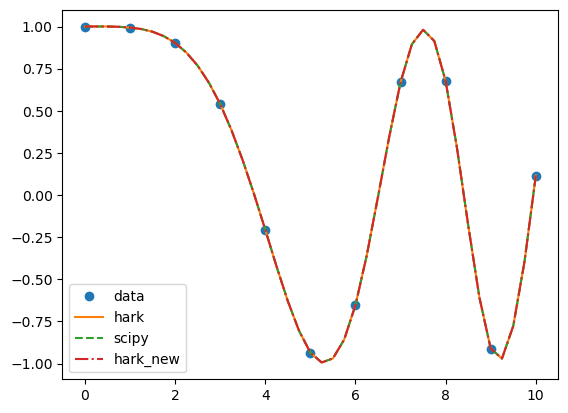

In [3]:
xnew = np.linspace(0, 10, num=41, endpoint=True)

plt.plot(x, y, "o", xnew, f(xnew), "-", xnew, f2(xnew), "--", xnew, f3(xnew), "-.")
plt.legend(["data", "hark", "scipy", "hark_new"], loc="best")
plt.show()

We can also verify that **CubicHermiteInterp** works as intended when extrapolating. Scipy's **CubicHermiteSpline** behaves differently when extrapolating, as it extrapolates using the last polynomial, whereas HARK implements linear decay extrapolation, so it is not shown below.

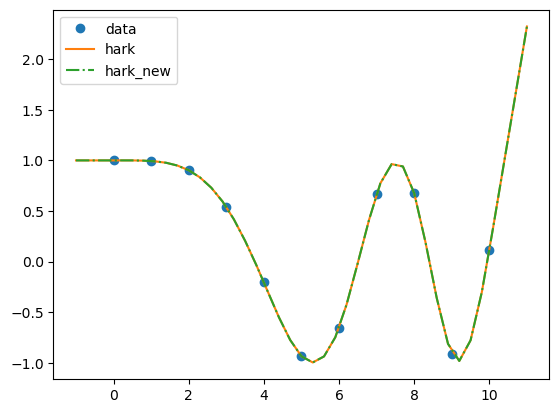

In [4]:
x_out = np.linspace(-1, 11, num=41, endpoint=True)

plt.plot(x, y, "o", x_out, f(x_out), "-", x_out, f3(x_out), "-.")
plt.legend(["data", "hark", "hark_new"], loc="best")
plt.show()

### Timings

Below we can compare timings for interpolation and extrapolation among the 3 interpolators. As expected, `scipy`'s CubicHermiteInterpolator (`f2` below) is the fastest, but it's not HARK compatible. `HARK.interpolation`'s CubicInterp (`f`) is the slowest, and `HARK.interpolation`'s new CubicHermiteInterp (`f3`) is somewhere in between.

In [5]:
%timeit f(xnew)
%timeit f(x_out)

31.3 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


33.2 µs ± 672 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [6]:
%timeit f2(xnew)
%timeit f2(x_out)

4.83 µs ± 88.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


4.92 µs ± 74.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [7]:
%timeit f3(xnew)
%timeit f3(x_out)

10.6 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


23.2 µs ± 1.09 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Notice in particular the difference between interpolating and extrapolating for the new ** CubicHermiteInterp **.The difference comes from having to calculate the extrapolation "by hand", since `HARK` uses linear decay extrapolation, whereas for interpolation it returns `scipy`'s result directly.